# 1 -Introduction

Nama: Ikhbar Firman Hanafi

Batch: 14

Phase: 1

URL: https://p2ml1-ikhbarfirman.herokuapp.com/

## Data set

The data set includes information about:

Customers who left within the last month – the column is called Churn
Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
Demographic info about customers – gender, age range, and if they have partners and dependents

Sumber data: https://www.kaggle.com/datasets/blastchar/telco-customer-churn

### Attributes:
1. Customer ID represent ID for each customers
2. gender : Whether the customer is a male or a female
3. SeniorCitizen : Whether the customer is a senior citizen or not (1, 0)
4. Partner : Whether the customer has a partner or not (Yes, No)
5. Dependents : Whether the customer has dependents or not (Yes, No)
6. tenure : Number of months the customer has stayed with the company
7. PhoneService : Whether the customer has a phone service or not (Yes, No)
8. MultipleLines : Whether the customer has multiple lines or not (Yes, No, No phone service)
9. InternetService : Customer’s internet service provider (DSL, Fiber optic, No)
10. OnlineSecurity : Whether the customer has online security or not (Yes, No, No internet service)
11. OnlineBackup : Whether the customer has online backup or not (Yes, No, No internet service)
12. DeviceProtection : Whether the customer has device protection or not (Yes, No, No internet service)
13. TechSupport : Whether the customer has tech support or not (Yes, No, No internet service)
14. StreamingTV : Whether the customer has streaming TV or not (Yes, No, No internet service)
15. StreamingMovies : Whether the customer has streaming movies or not (Yes, No, No internet service)

16. Contract : The contract term of the customer (Month-to-month, One year, Two year)

17. PaperlessBilling : Whether the customer has paperless billing or not (Yes, No)

18. PaymentMethod : The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))

19. MonthlyCharges : The amount charged to the customer monthly

20. TotalCharges : The total amount charged to the customer

21. Churn : Whether the customer churned or not (Yes or No)

Data source: https://www.kaggle.com/datasets/blastchar/telco-customer-churn

## Objective
Membuat prediksi kecenderungan customer akan berhenti berlangganan atau tidak.

# 2 - Import Libraries

import libraries yang diperlukan

In [630]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from sklearn.preprocessing import StandardScaler,OneHotEncoder,OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve,confusion_matrix,ConfusionMatrixDisplay,classification_report
import tensorflow as tf
from tensorflow import keras
import joblib

# 3 - Data Loading

Load data dalam DataFrame

In [631]:
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv') #load data from csv to DataFrame
data.head() #Menampilkan 5 baris pertama pada dataset

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [632]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Dataset disini berjumlah 7043 datapoints dimana tiap data points atau tiap baris data merepresentasikan tiap customer. Data set ini memiliki mayoritas features tipe object dan terdapat numerical features 'SeniorCitizen'(binary categorical dalam integer) dan 'tenure' dalam integer dan 'MonthlyCharges' dalam float (real numbers). Namuan feature 'TotalCharges' tertulis tipe object, yang mana merupakan total biaya pada customers dan seharusnya merupakan bilangan. Berdasarkan info diatas sejauh ini tidak terdeteksi adanya null atau missing values pada tiap features tersebut.

Untuk menyamakan dengan fatures object lainnya, kita ubah value SeniorCitizen dalam bentuk string 'Yes' dan 'No'.(Meskipun nantinya akan dilakukan encoding terhadap feature ini)

In [633]:
# replace values for SeniorCitizen as a categorical feature
data['SeniorCitizen'] = data['SeniorCitizen'].replace({1:'Yes',0:'No'})

Kita coba cek value pada feature 'TotalCharges'.

In [634]:
data['TotalCharges']

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

Dapat dilihat value feature 'TotalCharges' adalah suatu bilangan yang merupakan string. Kita akan ubah ke dalam tipe float.

In [635]:
#data['TotalCharges'].astype('float64')

Apabila kita run code di atas akan tertulis: *could not convert string to float: ''*. Maka terdapat string yang bukan bilangan pada feature 'totalcharges' yaitu ' ' (spasi) sehingga tidak dapat diconvert menjadi float. Kita akan ubah ' ' menjadi NaN

In [636]:
data['TotalCharges'] = data['TotalCharges'].replace(' ', np.NaN) #Mengubah string ' ' menjadi NaN
data['TotalCharges'] = data['TotalCharges'].astype('float64') #Mengubah type string menjadi float

Sebelum kita memutuskan kedepannya missing value tersebut akan dilakukan impute value atau remove, kita coba cek missing value yang terdeteksi di feature totalcharges.

In [637]:
data[data.isnull().any(axis=1)]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,No,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,No,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,No,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,No,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,No,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,No,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


Customer dengan missing value totalcharges berjumlah 11 dan tergolong status churn 'No' yang artinya masih berlangganan. Hampir semua customer tersebut berlangganan dengan contract 'Two Year' dan value tenure semua customer adalah 0. Disini saya artikan tenure 0 adalah masa berlangganan belum sampai 1 bulan. Dengan demikian 11 customer ini merupakan customer yang baru berlangganan. Kita coba cek data dengan tenure value 0 berikut.

In [638]:
data[data['tenure'] == 0]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,No,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,No,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,No,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,No,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,No,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,No,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


Semua customer dengan value tenure 0 merupakan customer yang tidak mempunyai totalcharges. Mungkin saja karena baru berlangganan dan belum sampai satu bulan, maka belum tercatat value totalcharges. Kita tidak mengetahui bagaimana perhitungan totalcharges, namun nampaknya totalcharges bergantung dengan jumlah bulan berlangganan serta beberapa hal lain, seperti pajak, denda keterlamabatan membayar dan sebagainya. Oleh karena itu kita akan set total charges menjadi 0 untuk tenure 0.

In [639]:
filter_nan = data['tenure'] == 0  #filter untuk missing value data, dimana tenure value 0
data.loc[filter_nan,'TotalCharges'] = 0 #set value totalcharges sama dengan monthlycharges pada NaN

In [640]:
print(np.sum(data.isnull().any())) #Cek jumlah missing value

0


Berikutnya kita coba perhatikan nilai statistik value dari numerical features.

In [641]:
data.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


Terlihat feature SeniorCitizen memiliki minimum value 0 dan maximum value 1 dan hal tersebut wajar karena features tersebut merupakan binary categorical. Feature tenure merupakan berapa lama (in month) customers yang masih tetap berlangganan dan value feature ini memiliki minimum 0 dan maximum 72. Value 0 tenure ini bisa dapat diartikan sebagai customer baru yang bahkan belum sampai satu bulan. Tidak terlihat suatu keanehan value, karena tidak ada negative value, value dalam integer (karena jumlah month), serta tidak terdapat value yang sangat besar. Dimana maximum value 72 atau dapat dijelaskan customers terlama yang berlangganan adalah selama 72 bulan atau 2 tahun. Akan sangat aneh apabila terdapat value tenure yang sangat besar, katakanlah 600 atau 50 tahun. Sedangkan tidak ditemukan value yang aneh pada feature MonthlyCharges dan TotalCharges.

Untuk memperumudah proses analisis ke depannya, disini akan dirubah nama features column dalam huruf kecil.

In [642]:
# Set lowercase to columns
data.rename(columns= str.lower, inplace=True)

Berikutnya kita coba perhatikan value apa saja pada pbject features, mungkin saja terdapat suatu value yang aneh pada object features.

In [643]:
#Print unique value tiap object features
for col in data.select_dtypes('object').columns.tolist()[1:]:
    print(col, data[col].unique())

gender ['Female' 'Male']
seniorcitizen ['No' 'Yes']
partner ['Yes' 'No']
dependents ['No' 'Yes']
phoneservice ['No' 'Yes']
multiplelines ['No phone service' 'No' 'Yes']
internetservice ['DSL' 'Fiber optic' 'No']
onlinesecurity ['No' 'Yes' 'No internet service']
onlinebackup ['Yes' 'No' 'No internet service']
deviceprotection ['No' 'Yes' 'No internet service']
techsupport ['No' 'Yes' 'No internet service']
streamingtv ['No' 'Yes' 'No internet service']
streamingmovies ['No' 'Yes' 'No internet service']
contract ['Month-to-month' 'One year' 'Two year']
paperlessbilling ['Yes' 'No']
paymentmethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
churn ['No' 'Yes']


Terdapat beberapa features di data seperti Online Security memiliki value No dan No internet sercvice. Karena kedua value tersebut memiliki arti yang sama, maka saya akan mengubah value seperti 'No internet sercvice' menjadi 'No'. Hal tersebut juga diterapkan apda features dengan value serupa.

In [644]:
data['multiplelines'] = data['multiplelines'].replace('No phone service', 'No')
data[['onlinesecurity', 'onlinebackup', 'deviceprotection',
      'techsupport', 'streamingtv', 'streamingmovies']] = data[['onlinesecurity', 'onlinebackup', 
                                                                'deviceprotection', 'techsupport', 
                                                                'streamingtv', 'streamingmovies']].replace('No internet service', 'No')

Selanjutnya kita akan drop column 'customerid', karena dirasa tidak diperlukan dalam analisis kedepannya.

In [645]:
data.drop('customerid',axis=1,inplace=True)

# 4 - Exploratory Data Analysis (EDA)

Pertama kita coba tinjau target output 'churn', dimana value feature ini menjelaskan apakah customer berhenti berlangganan atau tidak pada bulan terakhir.

<AxesSubplot:xlabel='churn', ylabel='count'>

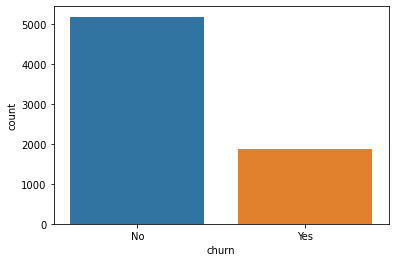

In [646]:
sns.countplot(x='churn',data=data)

Dapat dilihat kebanyakan customer masih bertahan pada bulan terakhir yaitu sekitar 5000 customer, sedangkan terdapat sekitar 1800 customer yang berhenti berlangganan dalam bulan terakhir yang mana cukup terbilang banyak.

Kita coba tinjau melihat berapa banyak jumlah male dan female beserta churned atau tidaknya.

<AxesSubplot:xlabel='gender', ylabel='count'>

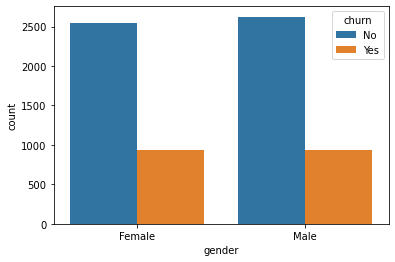

In [647]:
sns.countplot(x='gender',data=data, hue='churn')

Dapat dilihat proporsi customer female dan male hampir sama baik yang masih berlangganan maupun yang tidak.

Text(0.5, 1.0, 'Senior Citizen and Churn')

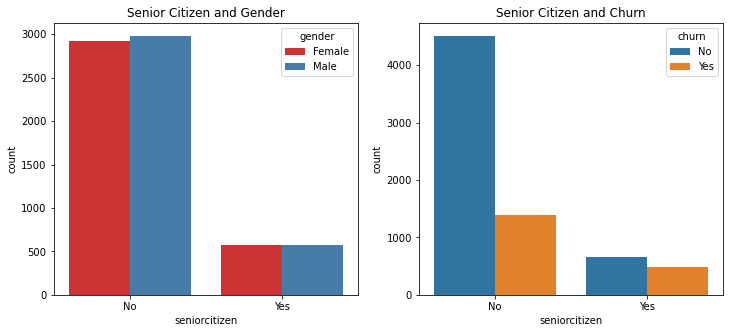

In [648]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(x='seniorcitizen',hue='gender',data=data,palette='Set1')
plt.title('Senior Citizen and Gender')
plt.subplot(1,2,2)
sns.countplot(x='seniorcitizen',hue='churn',data=data)
plt.title('Senior Citizen and Churn')

Dari gambar di atas terlihat sedikit proporsi senior citizen yang berlangganan baik female maupun male. Selain itu proporsi senior citizen yang berhenti berlangganan hampir menyamai proporsi senior citizen yang berlangganan. Bisa jadi senior citizen merupakan orang yang sudah tua ataupun di masa pensiun merasa tidak memerlukan berbagai fasilitas telekomunikasi, jaringan internet dan sebagainya.

Text(0.5, 1.0, 'Churn = No')

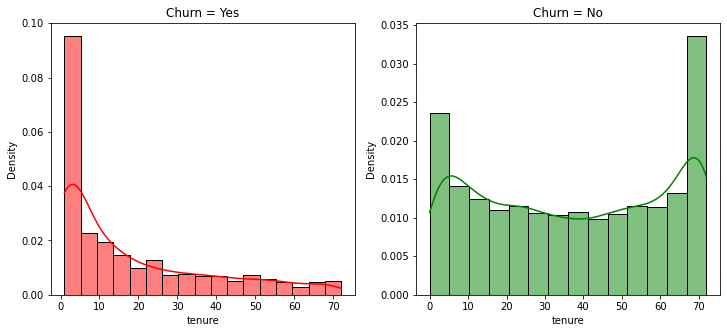

In [649]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(x = 'tenure',data=data[data['churn'] == 'Yes'],stat='density',color='red',kde=True)
plt.title('Churn = Yes')
plt.subplot(1,2,2)
sns.histplot(x = 'tenure',data=data[data['churn'] == 'No'],stat='density',color='green',kde=True)
plt.title('Churn = No')

Dari sini kita bisa melihat bahwa kebanyakan customer yang berhenti berlangganan dalam bulan terakhir memiliki masa berlangganan (tenure) dengan value dibawah 5 bulan, atau dapat dikatakan banyak customer dibawah 5 bulang yang berhenti berlangganan pada bulan terakhir. Sedangkan proporsi terbesar customer yang masih berlangganan berada pada value tenure sekitar 70, atau dapat dikatakan kebanyakan customer yang masih berlangganan adalah customer lama yang sudah berlangganan selama sekitar 70 bulan atau sekitar 2 tahun. Hal tersebut perlu diselidiki lagi, mengapa banyak customer baru yang berhenti berlangganan.

Kita coba tinjau banyaknya customer yang berhenti berlangganan dari berbagai service digunakan.

<AxesSubplot:xlabel='streamingmovies', ylabel='count'>

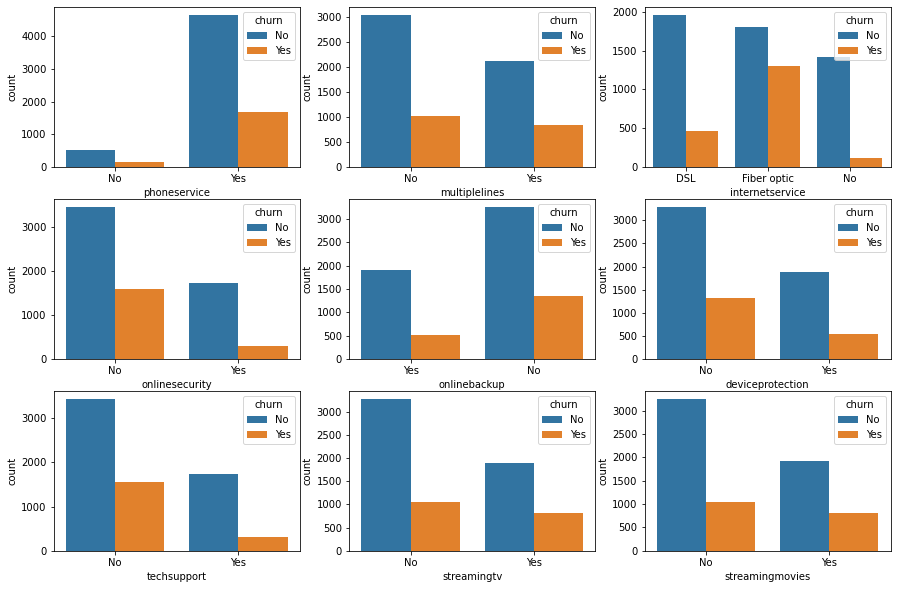

In [650]:
# Plot jumlah customer yang berhenti berlangganan atau tidak terhadap masing-masing jenis layanan
plt.figure(figsize=(15,10))
plt.subplot(3,3,1)
sns.countplot(x='phoneservice',hue='churn',data=data)
plt.subplot(3,3,2)
sns.countplot(x='multiplelines',hue='churn',data=data)
plt.subplot(3,3,3)
sns.countplot(x='internetservice',hue='churn',data=data)
plt.subplot(3,3,4)
sns.countplot(x='onlinesecurity',hue='churn',data=data)
plt.subplot(3,3,5)
sns.countplot(x='onlinebackup',hue='churn',data=data)
plt.subplot(3,3,6)
sns.countplot(x='deviceprotection',hue='churn',data=data)
plt.subplot(3,3,7)
sns.countplot(x='techsupport',hue='churn',data=data)
plt.subplot(3,3,8)
sns.countplot(x='streamingtv',hue='churn',data=data)
plt.subplot(3,3,9)
sns.countplot(x='streamingmovies',hue='churn',data=data)

Disini kita fokuskan pada customer yang berhenti berlangganan (barchart warna orange). Berdasarkan internet service, kebanyakan customer yang berhenti berlangganan sekitar 1300 customer adalah customer yang mengikuti layanan fiber optic. Selain itu pada phoneservicel, terdapat sekitar 1700 customer yang berhenti berlangganan pada bulan terakhir. Kedua jumlah tersebut cukup besar, mengingat total customer yang berhenti berlangganan dalam bulan terakhir sebanyak 1800. Perlu diselidiki lebih lanjut mengenai dua layanan tersebut dan pengaruhnya terhadap keputusan customer yang berhenti berlangganan.

Berikutnya kita coba banyaknya customer yang berhenti berlangganan atau tidak dengan meninjau features 'contract', 'paperlessbilling', dan 'paymentmethod'.

<AxesSubplot:xlabel='paymentmethod', ylabel='count'>

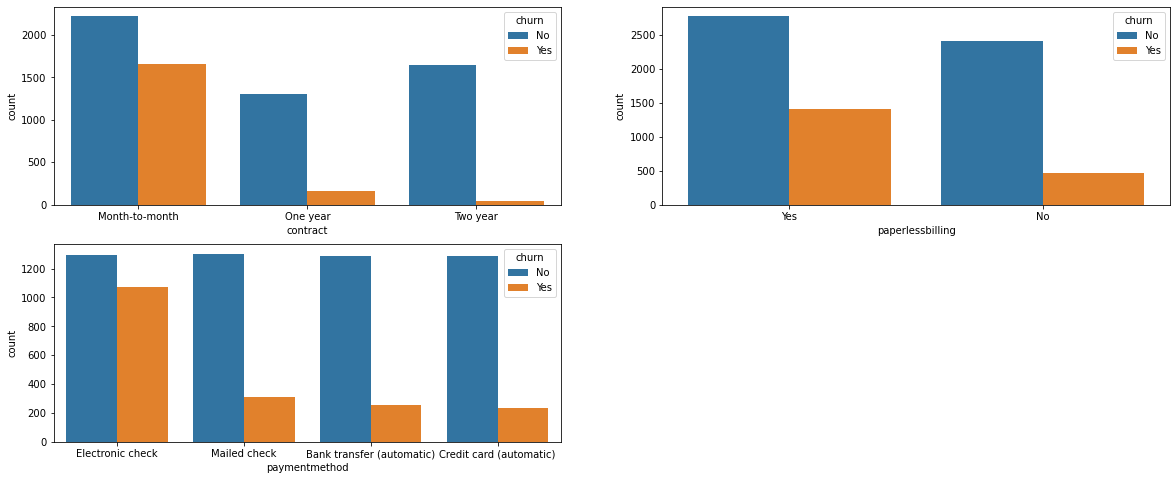

In [651]:
# Plot jumlah customer yang berhenti berlangganan atau tidak terhadap masing-masing jenis layanan
plt.figure(figsize=(20,8))
plt.subplot(2,2,1)
sns.countplot(x='contract',hue='churn',data=data)
plt.subplot(2,2,2)
sns.countplot(x='paperlessbilling',hue='churn',data=data)
plt.subplot(2,2,3)
sns.countplot(x='paymentmethod',hue='churn',data=data)

Berdasarkan jenis contract, kebanyakan customer yang berhenti berlangganan adalah dengan 'Month-to-month' contract. Hal tersebut wajar, karena kontrak hanya satu bulan sehingga customer mungkin hanya mau mencoba berlangganan dan berpaling ke provider lain yang mungkin lebih baik atau mengadakan potongan harga (promo). Selain itu banyak customer yang berhenti berlangganan dengan paperless billing dan metode pembayaran electronic check. Bisa jadi terdapat masalah pada dua hal tersebut yang mengakibatkan customer berhenti berlangganan.

Text(0.5, 1.0, 'Churn = No')

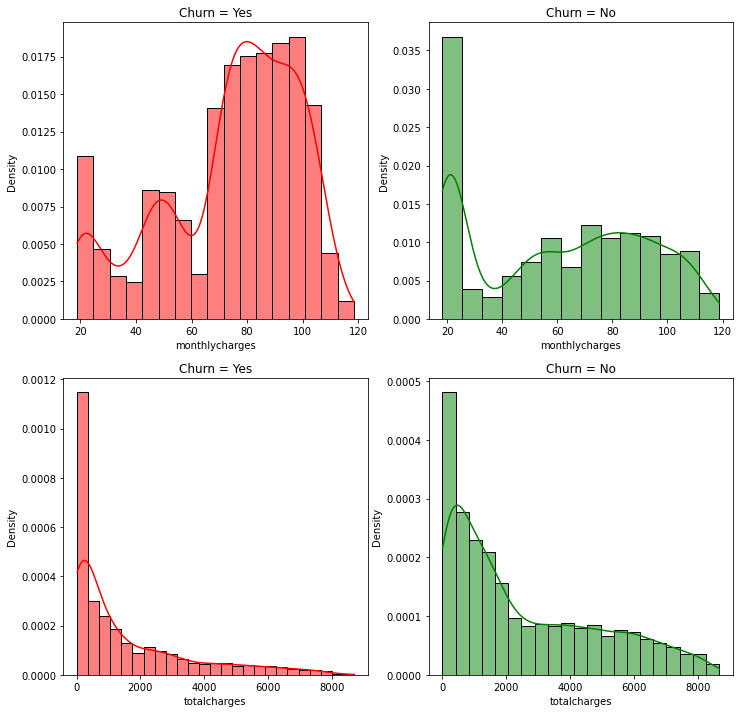

In [652]:
# Perbandinga value monthlycahrges dan totalcharges berdasarkan status churn customer
plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
sns.histplot(x = 'monthlycharges',data=data[data['churn'] == 'Yes'],stat='density',color='red',kde=True)
plt.title('Churn = Yes')
plt.subplot(2,2,2)
sns.histplot(x = 'monthlycharges',data=data[data['churn'] == 'No'],stat='density',color='green',kde=True)
plt.title('Churn = No')
plt.subplot(2,2,3)
sns.histplot(x = 'totalcharges',data=data[data['churn'] == 'Yes'],stat='density',color='red',kde=True)
plt.title('Churn = Yes')
plt.subplot(2,2,4)
sns.histplot(x = 'totalcharges',data=data[data['churn'] == 'No'],stat='density',color='green',kde=True)
plt.title('Churn = No')

Hal yang terlihat jelas disini adalah pada monthly charges. Kebayakan customer yang berhenti berlangganan adalah customer dengan monthlycharges value 70-110 (asumsi dalam USD). Berbeda pada customer yang masih loyal dengan proporsi terbanyak monthlycharges value 20. Dari sini dapat dikatakan kebanyakan customer yang masih loyal adalah customer dengan monthlycharges yang sedikit, sedangkan customer yang berhenti berlangganan mungkin merasa biaya yang dikenakan cukup mahal atas layanan yang diberikan.

Untuk memudahkan analisis berikutnya, value target churn akan kita ubah ke bentuk binary numeric.

In [653]:
data['churn'].replace({'No':0,'Yes':1}, inplace=True)

# 5 - Data Preprocessing

## Get Data for Model Inference

In [654]:
# Get Data for Model Inference

data_inf = data.sample(10, random_state=17)
data_inf

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
3616,Female,Yes,Yes,No,69,Yes,No,Fiber optic,Yes,Yes,No,No,No,Yes,One year,No,Credit card (automatic),87.30,6055.55,0
2055,Male,No,No,No,45,Yes,Yes,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),108.45,4964.70,0
5394,Female,No,Yes,No,48,Yes,Yes,Fiber optic,No,Yes,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),105.10,5083.55,0
3697,Female,No,Yes,Yes,32,Yes,Yes,Fiber optic,Yes,No,No,No,Yes,No,Month-to-month,No,Electronic check,89.60,2901.80,0
2516,Female,Yes,No,No,16,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,96.40,1581.20,1
6368,Male,Yes,No,No,2,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,94.00,181.70,1
4183,Male,No,No,Yes,1,No,No,DSL,No,Yes,No,Yes,No,No,Month-to-month,No,Mailed check,33.60,33.60,0
3543,Male,No,Yes,No,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,No,Yes,Two year,No,Bank transfer (automatic),105.60,7581.50,0
6674,Male,No,No,No,7,Yes,Yes,No,No,No,No,No,No,No,Month-to-month,No,Mailed check,23.50,173.00,0
1893,Male,No,No,Yes,16,Yes,Yes,DSL,Yes,Yes,No,No,No,Yes,Month-to-month,Yes,Electronic check,69.10,1083.70,0


Berikutnya kita akan remove titik point data inference dari dataset dan reset index pada kedua data.

In [655]:
# Remove Inference-Set from Dataset

data_train_test = data.drop(data_inf.index)

# Reset Index 
data_train_test.reset_index(drop=True, inplace=True) 
data_inf.reset_index(drop=True, inplace=True)

## Splitting between **X** (Features) and **y** (Target)

In [656]:
X = data_train_test.drop('churn',axis=1)
y = data_train_test['churn']

## Split between Train-Set, Validation-set, and Test-Set

Kita akan split data menjadi data train dan data test, dengan porsi 20% untuk data test dan 80% untuk data train.

In [657]:
# Split between Train-Set and Test-Set

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=17)
X_train, X_val, y_train, y_val = train_test_split(X_train_full,
                                                  y_train_full,
                                                  shuffle=True, test_size=0.2)

print('Train Size : ', X_train.shape)
print('Validation Size : ', X_val.shape)
print('Test Size  : ', X_test.shape)

Train Size :  (4500, 19)
Validation Size :  (1126, 19)
Test Size  :  (1407, 19)


Karena pada data sebelumnya tidak ditemukan missing values, maka selanjutnya kita akan coba cek outliers pada data train.

## Handling Outliers

Kita coba cek apakah terdapat outliers pada numeric features 'tenure','monthlycharges', dan 'totalcharges' dengan melihat distribusi value masing-masing feature.

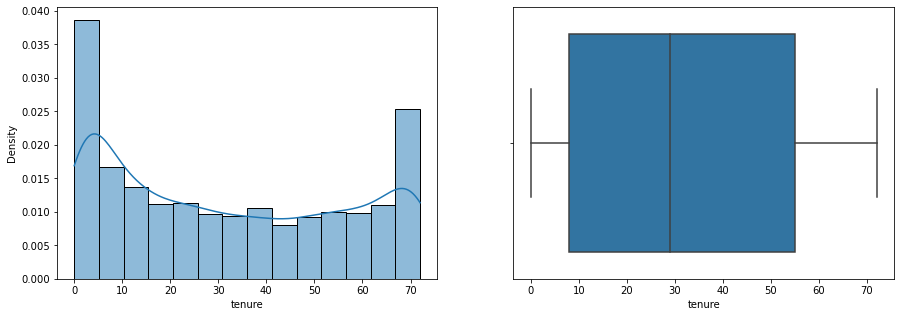

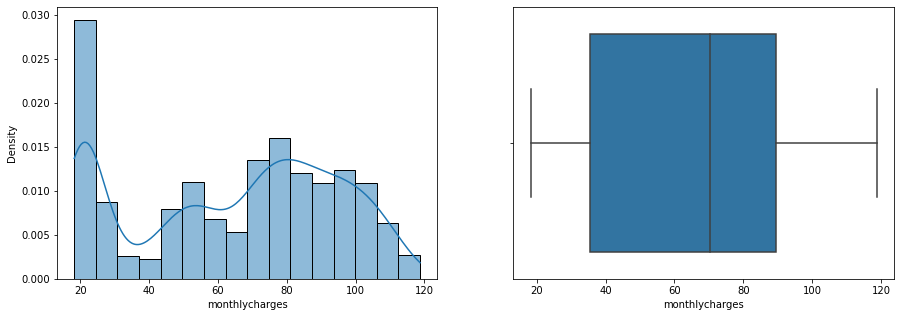

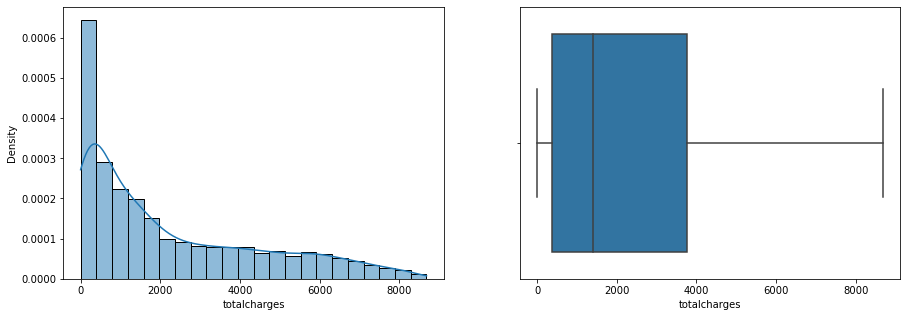

In [658]:
num_cols = ['tenure','monthlycharges','totalcharges'] #Define numerical column
# Plot histogram and boxplot for each feature in num_cols
for col in num_cols:
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    sns.histplot(x = col, data = X_train, stat='density',kde=True)
    
    plt.subplot(1,2,2)
    sns.boxplot(x=col, data=X_train)
    plt.show()

Berdasarkan histogram dan boxplot tiap feature diatas, tidak terlihat adanya outliers pada data train.

## Feature Scaling dan Encoding

Terdapat feature ordinal seperti 'internetservice' dan 'contract', dimana terdapat suatu urutan pada value features tersebut. Maka kedua features tersebut akan diterapkan OrdinalEncoder. Sedangkan untuk binary column features seperti gender, partner dsb juga akan diterapkan OrdinalEncoder, meskipun sebenarnya dapat dilakukan dengan LabelEncoder namun LabelEncoder menerima input suatu series single column yang tidak dapat dipadukan pada ColumnTransformer. Setelah semua feature telah menjadi suatu bilangan, setelahnya akan dilakukan scaling dengan StandardScaler.

In [659]:
num_cols = ['tenure','monthlycharges','totalcharges'] #Define numerical column
ordinal_cols = ['internetservice','contract'] # Define ordinal columns 
#Define binary columns
bin_cols = ['gender','seniorcitizen','partner','dependents','phoneservice','multiplelines','onlinesecurity',
            'onlinebackup','deviceprotection','techsupport','streamingtv','streamingmovies','paperlessbilling']
nom_cols = ['paymentmethod']        

In [660]:
# Define process in columntransformer and add it into final preprocessing pipeline
preprocessing = ColumnTransformer([
    ('label',OrdinalEncoder(),bin_cols),
    ('ordinal', OrdinalEncoder(categories=[['No', 'DSL', 'Fiber optic'],
                                     ['Month-to-month', 'One year', 'Two year']]),ordinal_cols),
    ('nominal', OneHotEncoder(),nom_cols),
])
final_preprocess = make_pipeline(preprocessing,StandardScaler())

setelahnya kita fit semua process tersebut dalam pipeline terhadap X_train, dan selanjutnya juga diterapkan transform pada X_val dan X_test.

In [661]:
X_train_ready = final_preprocess.fit_transform(X_train)
X_val_ready = final_preprocess.transform(X_val)
X_test_ready = final_preprocess.transform(X_test)

## Input Pipelline

Untuk mempermudah proses training fit selanjutnya, disini kita akan membuat pipeline untuk data train, data validation dan data test.

In [662]:
AUTOTUNE = tf.data.AUTOTUNE #set the number of elements to prefetch with AUTOTUNE

Untuk mempermudah proses kita gunakan function berikut untuk membungkus tiap input X dan output y ke suatu pipeline.

In [663]:
def get_batches(x, y, shuffle_buffer_size, batch_size, shuffle=False):
    
    #Building a pipeline from a data that exists in memory
    data_ds = tf.data.Dataset.from_tensor_slices((x, y))
    
    #mapping the fuction we alredy made to the data
    #preprocessed_data = data_ds.map(preprocessing)
    preprocessed_data=data_ds
    
    if shuffle:
        # if we want to shuffle the dataset given a buffer size
        shuffled_data = preprocessed_data.shuffle(shuffle_buffer_size)
        
        # prefetch` lets the dataset fetch batches in the background while the model is training.
        data_batches = shuffled_data.batch(batch_size).cache().prefetch(AUTOTUNE) #berapa banyak batch yg ingin di prefetch
        
    else: 
        
        data_batches = preprocessed_data.batch(batch_size).cache().prefetch(AUTOTUNE)
    
    
    return data_batches

Selanjutnya kita terapkan function di atas pada pasangan X dan y data train, data validation, dan data test.

In [664]:
training_batches = get_batches(X_train_ready, y_train, X_train_ready.shape[0], 64, shuffle=True)
validation_batches = get_batches(X_val_ready, y_val, X_val_ready.shape[0], 64, shuffle=False)
testing_batches = get_batches(X_test_ready, y_test, X_test_ready.shape[0], 64, shuffle=False)

# 6 - Model Definition

Model yang digunakan untuk memprediksi target output 'churn' adalah **Artificial Neural Network (ANN)** dengan **Sequential API** dan **Functional API**. ANN yang akan kita terapkan dapat memiliki beberapa hidden layers antara input layer dan output layer atau dikenal sebagai **Deep Neural Network (DNN)**.

Kita definisikan model ANN sequential dengan activation output 'sigmoid' (dikarenakan hanya terdapat dua kelas target output churn 0 dan 1) sebagai berikut:

In [665]:
tf.random.set_seed(42)
model_1 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=X_train_ready.shape[1:]),
    keras.layers.Dense(1,activation='sigmoid')
    ])

Selanjutnya model funtional API kita buat terdiri dari input layers, 2 hidden layers dengan 100 neuron pada hidden layer 1 dan 50 neuron pada hidden layer 2, dan output layers dengan activation function 'sigmoid'.

In [666]:
tf.random.set_seed(42)
input_ = keras.layers.Input(shape=X_train_ready.shape[1:])
hidden1 = keras.layers.Dense(100, activation="relu",kernel_initializer=keras.initializers.he_normal(seed=27))(input_)
hidden2 = keras.layers.Dense(50, activation="relu",kernel_initializer=keras.initializers.he_normal(seed=27))(hidden1)
output = keras.layers.Dense(1,activation='sigmoid')(hidden2)
model_2 = keras.models.Model(inputs=[input_], outputs=[output])

Mengingat proses yang dilakukan disini adalah binary classification, maka loss function yang digunakan adalah *binary_crossentropy* serta metrics yang digunakan adalah *Recall*. Adapun penggunaan metric *Recall* adalah karena kita memprioritaskan jumlah false negative, atau dengan kata lain meminimalkan customer yang terprediksi masih loyal padahal customer tersebut cenderung ingin berhenti berlangganan. Mengingat jumlah target class 0 dan 1 tidak seimbang (imbalanced data) maka kita akan terapkan pengaturan class_weight saat proses train model.

Kedua model yang sudah didefinisikan di atas dapat mengalami perubahan berbagai parameter saat proses training model selanjutnya.

# 7 - Model Training

Pada proses ini kita akan coba melihat performa dari kedua model tersebut, dan kita coba melakukan adjustment atau melatih model guna meningkatkan hasil prediksi dengan melakkan berbagai hal seperti:
 - Set jumlah hidden layers serta jumlah neuron pada tiap layers.
 - Melakukan regulasi pada hidden layer ataupun drop out untuk mencegah kecenderungan *over-fitting*.
 - Mengubah activation function pada tiap layers dan mengubah optimizer.

Untuk mendapatkan hasil yang stabil dengan TensorFlow kita set random seed sebagai berikut.

In [667]:
np.random.seed(27)
tf.random.set_seed(42)

## Model Sequential

Pertama kita coba set optimized dengan *Stochastic gradient descent (SGD)* dan fit dengan data train dan data validation yang sudah kita bentuk dalam tensorflow dataset.

In [668]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=5, verbose=0,
    mode='auto', baseline=None, restore_best_weights= True
)

In [669]:
model_1.compile(loss='binary_crossentropy',optimizer=keras.optimizers.SGD(),metrics=keras.metrics.Recall())
history = model_1.fit(training_batches, epochs=50,validation_data=validation_batches, callbacks=early_stopping,
                    class_weight={0: 1., 1: 3.})

Epoch 1/50
71/71 [==============================] - 2s 8ms/step - loss: 1.1733 - recall: 0.5952 - val_loss: 0.7228 - val_recall: 0.6989
Epoch 2/50
71/71 [==============================] - 0s 3ms/step - loss: 0.9862 - recall: 0.7414 - val_loss: 0.6525 - val_recall: 0.7778
Epoch 3/50
71/71 [==============================] - 0s 3ms/step - loss: 0.9071 - recall: 0.7742 - val_loss: 0.6154 - val_recall: 0.8029
Epoch 4/50
71/71 [==============================] - 0s 5ms/step - loss: 0.8655 - recall: 0.7964 - val_loss: 0.5921 - val_recall: 0.8280
Epoch 5/50
71/71 [==============================] - 0s 5ms/step - loss: 0.8402 - recall: 0.8013 - val_loss: 0.5758 - val_recall: 0.8459
Epoch 6/50
71/71 [==============================] - 0s 3ms/step - loss: 0.8234 - recall: 0.8054 - val_loss: 0.5637 - val_recall: 0.8495
Epoch 7/50
71/71 [==============================] - 0s 3ms/step - loss: 0.8116 - recall: 0.8112 - val_loss: 0.5542 - val_recall: 0.8459
Epoch 8/50
71/71 [==============================

Sebagai permulaan kita mendapatkan hasil yang cukup baik dengan train recall dan val recall yaitu diatas 0.8. Namun nampaknya recall validation data lebih besar daripada train data. Untuk lebih jelasnya score recall dan loss value dari train dan data validation pada tiap iterasinya dapat dijelaskan pada grafik berikut.

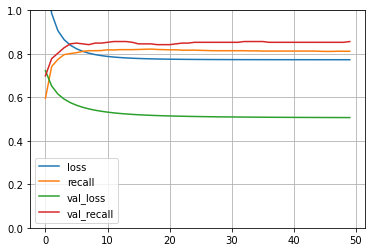

In [670]:
# Plot Recall score dan loss value pada data train maupun data validation
pd.DataFrame(history.history).plot()
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

Dari grafik terlihat baik loss value dan recall score kedua data cenderung konstan, sehingga apabila kita tingkatkan jumlah epoch nampaknya juga akan mendapati hal yang sama. Pada grafik di atas terlihat recall validation data sedikit lebih besar daripada train data.

Kita coba sedikit melakukan modifikasi seperti menambahkan beberapa hidden layers dengan sejumlah neuron serta melakukan initial random weight dengan kernel_initializer dan batchnormalization. Optimizer masih sama yaitu SGD namun saat ini kita set learning rate menjadi 0.003.

In [671]:
tf.random.set_seed(42)
model_1_new = keras.models.Sequential([
    keras.layers.Flatten(input_shape=X_train_ready.shape[1:]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(50, activation="relu",kernel_initializer=keras.initializers.he_normal(seed=27)),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(20, activation="relu",kernel_initializer=keras.initializers.he_normal(seed=27)),
    keras.layers.Dense(1, activation="sigmoid")
])

In [672]:
model_1_new.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(learning_rate=0.003),
                    metrics=keras.metrics.Recall())
history = model_1_new.fit(training_batches, epochs=50, validation_data=validation_batches,callbacks=early_stopping,
                        class_weight={0: 1., 1: 3.})

Epoch 1/50
71/71 [==============================] - 2s 9ms/step - loss: 1.3448 - recall_1: 0.3391 - val_loss: 0.7290 - val_recall_1: 0.5054
Epoch 2/50
71/71 [==============================] - 0s 3ms/step - loss: 1.1145 - recall_1: 0.5649 - val_loss: 0.6856 - val_recall_1: 0.6201
Epoch 3/50
71/71 [==============================] - 0s 3ms/step - loss: 1.0157 - recall_1: 0.6732 - val_loss: 0.6544 - val_recall_1: 0.6810
Epoch 4/50
71/71 [==============================] - 0s 3ms/step - loss: 0.9614 - recall_1: 0.7282 - val_loss: 0.6317 - val_recall_1: 0.7061
Epoch 5/50
71/71 [==============================] - 0s 3ms/step - loss: 0.9272 - recall_1: 0.7504 - val_loss: 0.6149 - val_recall_1: 0.7312
Epoch 6/50
71/71 [==============================] - 0s 3ms/step - loss: 0.9040 - recall_1: 0.7627 - val_loss: 0.6021 - val_recall_1: 0.7384
Epoch 7/50
71/71 [==============================] - 0s 3ms/step - loss: 0.8874 - recall_1: 0.7734 - val_loss: 0.5925 - val_recall_1: 0.7491
Epoch 8/50
71/71 [==

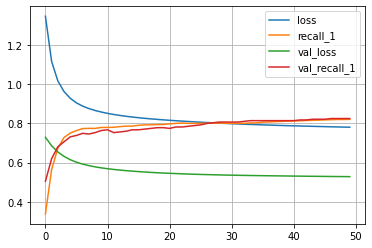

In [673]:
# Plot Recall score dan loss value pada data train maupun data validation
pd.DataFrame(history.history).plot()
plt.grid(True)
plt.show()

Apabila kita perhatikan hasil yang didapat tidaklah jauh berbeda dari sebelumnya dan kedua recall score pada data train sedikit lebih meningkat dengan selisih yang mengecil. Sehingga dapat dikatakan *good-fit*.

## Model Functional

Pertama kita coba melihat bagaimana performa dari model functional API yang sudah ktia definisikan sebelumnya. Kita coba set optimizer yang sama yaitu SGD dan melihat score recall pada data train maupun data validation.

In [ ]:
#model functional
tf.random.set_seed(42)
input_ = keras.layers.Input(shape=X_train_ready.shape[1:])
hidden1 = keras.layers.Dense(100, activation="relu",kernel_initializer=keras.initializers.he_normal(seed=27))(input_)
hidden2 = keras.layers.Dense(50, activation="relu",kernel_initializer=keras.initializers.he_normal(seed=27))(hidden1)
output = keras.layers.Dense(1,activation='sigmoid')(hidden2)
model_2 = keras.models.Model(inputs=[input_], outputs=[output])

In [697]:
model_2.compile(loss="binary_crossentropy",optimizer=keras.optimizers.SGD(),
                metrics=keras.metrics.Recall())
history_2 = model_2.fit(training_batches, epochs=50, validation_data=validation_batches,
                        callbacks=early_stopping,class_weight={0: 1., 1: 3.})

Epoch 1/50
71/71 [==============================] - 1s 7ms/step - loss: 0.7328 - recall_4: 0.8292 - val_loss: 0.5074 - val_recall_4: 0.8172
Epoch 2/50
71/71 [==============================] - 0s 3ms/step - loss: 0.7312 - recall_4: 0.8300 - val_loss: 0.5075 - val_recall_4: 0.8172
Epoch 3/50
71/71 [==============================] - 0s 3ms/step - loss: 0.7296 - recall_4: 0.8300 - val_loss: 0.5075 - val_recall_4: 0.8136
Epoch 4/50
71/71 [==============================] - 0s 4ms/step - loss: 0.7280 - recall_4: 0.8300 - val_loss: 0.5076 - val_recall_4: 0.8100
Epoch 5/50
71/71 [==============================] - 0s 3ms/step - loss: 0.7263 - recall_4: 0.8300 - val_loss: 0.5078 - val_recall_4: 0.8100
Epoch 6/50
71/71 [==============================] - 0s 3ms/step - loss: 0.7247 - recall_4: 0.8309 - val_loss: 0.5081 - val_recall_4: 0.8100


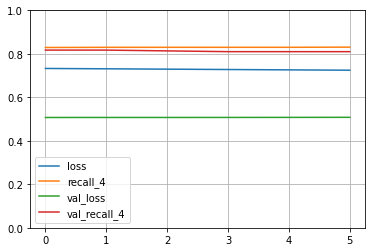

In [698]:
# Plot Recall score dan loss value pada data train maupun data validation
pd.DataFrame(history_2.history).plot()
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

Hasil yang kita dapatkan disini kurang lebih serupa dengan hasil model sequential API sebelumnya, yakni saat ini didapat train recall dan val recall sekitar di atas 0.8, serta loss value kedua data tidak menurun atau cenderung konstan seterusnya.

Mari kita coba modifikasi model ini dengan menambahkan beberapa hidden layers dan menetapkan kernel_initializer dan batchnormalization pada tiap hidden layers sebagai berikut.

In [676]:
tf.random.set_seed(42)
input_new = keras.layers.Input(shape=X_train_ready.shape[1:])
bn1 = keras.layers.BatchNormalization()(input_new)
hidden1_new = keras.layers.Dense(10, activation="relu",kernel_initializer = keras.initializers.he_normal(seed=27))(bn1)
bn2 = keras.layers.BatchNormalization()(hidden1_new)
hidden2_new = keras.layers.Dense(10, activation="relu",kernel_initializer = keras.initializers.he_normal(seed=27))(bn2)
bn2_ = keras.layers.BatchNormalization()(hidden2_new)
output_new = keras.layers.Dense(1,activation='sigmoid')(bn2_)
model_2_new = keras.models.Model(inputs=[input_new], outputs=[output_new])

Kita coba compile model tersebut dengan optimizer yang sama namun dengan menetapkan learning rate menjadi 0.005 dan meningkatkan epochs menjadi 80.

In [677]:
model_2_new.compile(loss="binary_crossentropy",optimizer=keras.optimizers.SGD(learning_rate=0.005),
                    metrics=keras.metrics.Recall())
history_2 = model_2_new.fit(training_batches, epochs=80, validation_data=validation_batches,
                            callbacks=early_stopping,class_weight={0: 1., 1: 3})

Epoch 1/80
71/71 [==============================] - 2s 8ms/step - loss: 1.1851 - recall_3: 0.6346 - val_loss: 0.7084 - val_recall_3: 0.7957
Epoch 2/80
71/71 [==============================] - 0s 3ms/step - loss: 1.0237 - recall_3: 0.6979 - val_loss: 0.6781 - val_recall_3: 0.7957
Epoch 3/80
71/71 [==============================] - 0s 3ms/step - loss: 0.9553 - recall_3: 0.7348 - val_loss: 0.6527 - val_recall_3: 0.8136
Epoch 4/80
71/71 [==============================] - 0s 3ms/step - loss: 0.9205 - recall_3: 0.7545 - val_loss: 0.6354 - val_recall_3: 0.8065
Epoch 5/80
71/71 [==============================] - 0s 3ms/step - loss: 0.8992 - recall_3: 0.7668 - val_loss: 0.6224 - val_recall_3: 0.7993
Epoch 6/80
71/71 [==============================] - 0s 3ms/step - loss: 0.8841 - recall_3: 0.7726 - val_loss: 0.6124 - val_recall_3: 0.8065
Epoch 7/80
71/71 [==============================] - 0s 3ms/step - loss: 0.8726 - recall_3: 0.7808 - val_loss: 0.6043 - val_recall_3: 0.8136
Epoch 8/80
71/71 [==

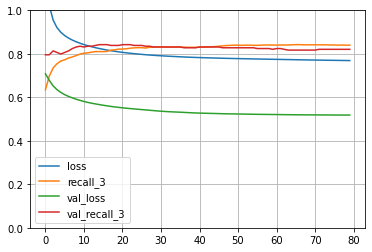

In [678]:
# Plot Recall score dan loss value pada data train maupun data validation
pd.DataFrame(history_2.history).plot()
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

Terlihat recall score kedua data sedikit lebih besar dan kedua recall score memiliki selisih yang semakin kecil dapat dikatakan *good-fit*.

# 8 - Model Evaluation

Pada bagian ini kita coba mengevaluasi kedua model yang sudah kita buat dan modifikasi sebelumnya pada data test dan melihat bagaimana tingkat error prediksi yang dihasilkan.

Pertama kita coba AUC score dari kedua model pada data test.

In [679]:
mse_test_1 = model_1.evaluate(testing_batches)
mse_test_1_new = model_1_new.evaluate(testing_batches)
mse_test_2 = model_2.evaluate(testing_batches)
mse_test_2_new = model_2_new.evaluate(testing_batches)
print('Loss for model sequential:', mse_test_1[0],'with recall score:',mse_test_1[1])
print('Loss for model sequential new:', mse_test_1_new[0],'with recall score:',mse_test_1_new[1])
print('Loss for model functional:', mse_test_2[0],'with recall score:',mse_test_2[1])
print('Loss for model functional new:', mse_test_2_new[0],'with recall score:',mse_test_2_new[1])

22/22 [==============================] - 0s 2ms/step - loss: 0.5495 - recall_3: 0.8081
Loss for model sequential: 0.5415502190589905 with recall score: 0.8027027249336243
Loss for model sequential new: 0.546398937702179 with recall score: 0.8189189434051514
Loss for model functional: 0.5370654463768005 with recall score: 0.7837837934494019
Loss for model functional new: 0.5495440363883972 with recall score: 0.8081080913543701


Keempat model menghasilkan recall score sekitar 0.8 dan tidaklah jauh berbeda. Namun pada eksperimen ini didapatkan model yang sudah dilakukan modifikasi menghasilkan score recall yang lebih besar dibandingkan sebelumnya. Dari keempat model tersebut model sequential yang telah dimodifikasi menghasilkan recall score terbesar, meskipun selisihnya tidak jauh berbeda pada score recall model lainnya.

Kita dapat mengeluarkan prediction dari keempat model tersebut dalam bentuk probability target.

In [699]:
# Menghasilkan predict proba pada masing-masing model
y_proba_1 = model_1.predict(X_test_ready)
y_proba_1_new = model_1_new.predict(X_test_ready)
y_proba_2 = model_2.predict(X_test_ready)
y_proba_2_new = model_2_new.predict(X_test_ready)

44/44 [==============================] - 0s 2ms/step


In [700]:
# Melakukan round, dimana probability di atas 0.5 akan menjadi 1 atau dikalisikasi ke kelas 1 dan sebaliknya
y_pred_1 = y_proba_1.round()
y_pred_1_new = y_proba_1_new.round()
y_pred_2 = y_proba_2.round()
y_pred_2_new = y_proba_2_new.round()

Berikutnya kita akan tampilkan score lainnya seperti precision f1 score dan accuracy dan menampilkan confussion matrix yang berisikan jumlah true positive, false positive, true negative, dan false negative.

In [701]:
print(classification_report(y_test,y_pred_1)) #Menampilkan classification report model sequential

              precision    recall  f1-score   support

           0       0.91      0.70      0.79      1037
           1       0.49      0.80      0.61       370

    accuracy                           0.73      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.80      0.73      0.74      1407



Berdasarkan penjabaran di atas terlihat score accuracy yang tidak besar yaitu 0.73 dan precision kelas 1 yaitu 0.48 dengan kenaikan recall score 0.8. Hal tersebut wajar dikarenakan kita melatih model untuk fokus pada recall score kelas 1. Namun accuracy 0.73 masih terbilang cukup baik.

Text(0.5, 1.0, 'Sequential model 1')

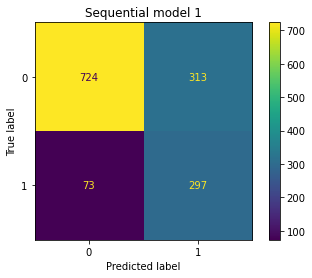

In [683]:
#Confussion matrix model sequential data test
cm_1 = confusion_matrix(y_test,y_pred_1)
ConfusionMatrixDisplay(cm_1).plot()
plt.title('Sequential model 1')

Kita fokuskan pada jumlah false negative yaitu sebanyak 73. Artinya terdapat 73 customer yang cenderung berhenti berlangganan namn terprediksi masih loyal dan mau berlangganan. Akan tetapi jumlah false positive cukup besar yaitu 313. 

In [702]:
print(classification_report(y_test,y_pred_1_new)) #Menampilkan classification report model sequential new

              precision    recall  f1-score   support

           0       0.91      0.68      0.78      1037
           1       0.48      0.82      0.61       370

    accuracy                           0.72      1407
   macro avg       0.70      0.75      0.69      1407
weighted avg       0.80      0.72      0.74      1407



Pada model sequential yang kita lakukan modifikasi memiliki score accuracy yang sedikit turun yaitu 0.72 dan precision kelas 1 yaitu 0.48. Akan tetapi disini kita dapatkan score recall yang sedikit lebih tinggi pada target kelas 1 yaitu 0.82(setelah dibulatkan dua desimal). Untuk lebih jelasnya pada jumlah false negative, false positive dapat dilihat pada confussion matrix berikut.

Text(0.5, 1.0, 'Sequential model 1 new')

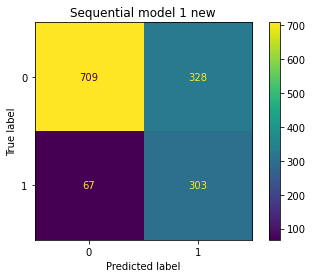

In [685]:
#Confussion matrix for model sequential new
cm_1_new = confusion_matrix(y_test,y_pred_1_new)
ConfusionMatrixDisplay(cm_1_new).plot()
plt.title('Sequential model 1 new')

Dengan modifikasi model sequential kita dapatkan jumlah false positive turun menjadi 67 sebagaimana pada kenaikan recall score kelas 1. Namun harga yang dibayar untuk ini adalah kenaikan jumlah false positive kelas 1 dan penurunan true positive kelas 0.

In [703]:
print(classification_report(y_test,y_pred_2)) #Menampilkan classification report model functional

              precision    recall  f1-score   support

           0       0.90      0.71      0.79      1037
           1       0.49      0.78      0.60       370

    accuracy                           0.73      1407
   macro avg       0.69      0.74      0.70      1407
weighted avg       0.79      0.73      0.74      1407



Pada model functional disini secara keseluruhan score sedikit dibawah dibanding model sequential (tanpa modifikasi). Untuk lebih jelasnya kita coba perhatikan confussion matrix untuk model functional berikut.

Text(0.5, 1.0, 'Functional model')

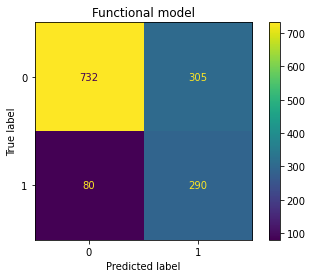

In [704]:
#Confussion matrix for model functional
cm_2 = confusion_matrix(y_test,y_pred_2)
ConfusionMatrixDisplay(cm_2).plot()
plt.title('Functional model')

Terlihat jumlah false negative sebesar 80 yang mana paling besar diantara keempat model. Selain itu jumlah true negative sebesar 732 yang cukup besar dan false negative kecil dibanding laiinya yaitu 305.

In [688]:
print(classification_report(y_test,y_pred_2_new)) #Menampilkan classification report model functional new

              precision    recall  f1-score   support

           0       0.91      0.67      0.77      1037
           1       0.46      0.81      0.59       370

    accuracy                           0.70      1407
   macro avg       0.68      0.74      0.68      1407
weighted avg       0.79      0.70      0.72      1407



Pada mode functional yang telah dilakukan modifikasi disini mendapatkan recall score yang cukup baik yaitu 0.81. Score precision kelas 1 yang tidak begitu kecil dibanding laiinya yaitu 0.46 serta accuracy score 0.70. Secara keseluruhan model ini masih memiliki recall score yang cukup baik.

Text(0.5, 1.0, 'Functional model new')

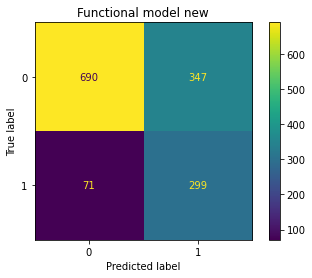

In [689]:
#Confussion matrix for model functional new
cm_2_new = confusion_matrix(y_test,y_pred_2_new)
ConfusionMatrixDisplay(cm_2_new).plot()
plt.title('Functional model new')

Pada model ini kita mendapatkan jumlah false negative yaitu 71 yang tidak jauh berbeda pada false negative model sequential (dengan modifikasi) yaitu 67. Selain itu jumlah true positive pada model ini adalah 690 yang masih sedikit dibawah true positive model sequential (dengan modifikasi) yaitu 709. 

Selanjutnya kita dapat menampilkan ROC curve beserta area under ROC curve sebagai berikut.

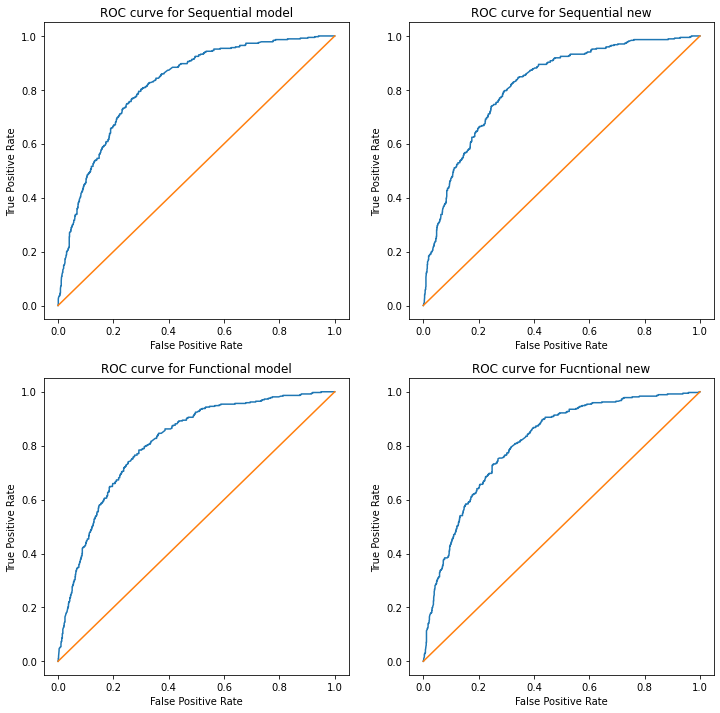

Sequential model roc auc: 0.8176131773045948
Sequential new model roc auc: 0.8159972894784852
Functional model roc auc: 0.8111392009174072
Functional new model roc auc: 0.8108629362245563


In [705]:
# ROC curve pada model logistic regression tanpa tuning
fpr1, tpr1, thresholds1 = roc_curve(y_test, y_proba_1)
fpr1_new, tpr1_new, thresholds1_new = roc_curve(y_test, y_proba_1_new)
fpr2, tpr2, thresholds2 = roc_curve(y_test, y_proba_2)
fpr2_new, tpr2_new, thresholds2_new = roc_curve(y_test, y_proba_2_new)

plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
plt.plot(fpr1,tpr1)
plt.plot([0,1],[0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC curve for Sequential model")

plt.subplot(2,2,2)
plt.plot(fpr1_new,tpr1_new)
plt.plot([0,1],[0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC curve for Sequential new")

plt.subplot(2,2,3)
plt.plot(fpr2,tpr2)
plt.plot([0,1],[0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC curve for Functional model")

plt.subplot(2,2,4)
plt.plot(fpr2_new,tpr2_new)
plt.plot([0,1],[0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC curve for Fucntional new")
plt.show()

print("Sequential model roc auc:",roc_auc_score(y_test,y_proba_1))
print("Sequential new model roc auc:",roc_auc_score(y_test,y_proba_1_new))
print("Functional model roc auc:",roc_auc_score(y_test,y_proba_2))
print("Functional new model roc auc:",roc_auc_score(y_test,y_proba_2_new))

Berdasarkan grafik serta AUC score, dapat dilihat keempat model memiliki AUC scoore yang tidak jauh berbeda yaitu sekitar 0.8-0.82. Apabila kita perhatikan AUC score pada model yang dilakukan modifikasi (baik sequential maupun functional) nilainya lebih kecil dari AUC score model tanpa modifikasi. Hal tersebut wajar, dikarenakan kita melakukan modifikasi dengan orientasi meningkatkan score recall sehingga score precision (false positive semakin besar) semakin mengecil pada model modifikasi. Yang mana menyebabkan secara keseluruhan score AUC menjadi lebih kecil dibanding sebelum dilakukan modifikasi.

Berdasarkan berbagai penjabaran di atas, nampaknya model sequential yang dilakukan modifikasi merupakan yang terbaik dari keempat model yang telah diterapkan. Dikarenakan jumlah false negative yang kecil, recall score yang cukup besar serta negative positive yang juga tidak terlalu besar (dibanding model sequential modifikasi).

# 9 - Model Saving

Pada proses ini kita akan save proses yang telah kita lakukan dari preprocessing data hingga model prediksi.

Untuk preprocessing sebelumnya telah kita jadikan pipeline dan sudah dilakukan fit, maka kita hanya tinggal save pipeline tersebut.

In [691]:
#with open('preprocess_pipeline.pkl', 'wb') as file_1:
  #joblib.dump(final_preprocess, file_1)

Sedangkan model yang akan disimpan adalah model sequential yang sudah dilakukan modifikasi yaitu model_1_new.

In [692]:
# freeze model
#model_1_new.trainable = False

#Save model
#model_1_new.save("churn_model")

# 10 - Model Inference

Model yang sudah dilatih akan dicoba pada data yang bukan termasuk ke dalam train-set ataupun test-set, yakni data inference. 

In [706]:
X_inf = data_inf.drop('churn', axis = 1)
y_inf = data_inf['churn']

In [707]:
X_inf_ready = preprocessing.transform(X_inf)

In [708]:
y_pred_inf_1 = np.round(model_1.predict(X_inf_ready))
y_pred_inf_1_new = np.round(model_1_new.predict(X_inf_ready))
y_pred_inf_2 = np.round(model_2.predict(X_inf_ready))
y_pred_inf_2_new = np.round(model_2_new.predict(X_inf_ready))

1/1 [==============================] - 0s 25ms/step


In [709]:
inf_prediction = pd.DataFrame({'churn':y_inf,'predict_seq':y_pred_inf_1[:,0],'predict_seq_new':y_pred_inf_1_new[:,0],
                                'predict_func':y_pred_inf_2[:,0],'predict_func_new':y_pred_inf_2_new[:,0]})
inf_prediction

,churn,predict_seq,predict_seq_new,predict_func,predict_func_new
0,0,0.0,0.0,0.0,0.0
1,0,1.0,1.0,1.0,1.0
2,0,1.0,1.0,1.0,1.0
3,0,1.0,1.0,1.0,1.0
4,1,1.0,1.0,1.0,1.0
5,1,1.0,1.0,1.0,1.0
6,0,0.0,1.0,0.0,0.0
7,0,0.0,0.0,0.0,0.0
8,0,0.0,1.0,0.0,0.0
9,0,1.0,1.0,0.0,0.0


Dapat dilihat keempat model dapat memprediksi dengan lancar dimana tidak terdapat value prediksi yang tidak sesuai seperti negative value, decimal, ataupun positive integer yang lebih besar dari 1. Apabila kita perhatikan banyak value 0 actual churn yang terprediksi menjadi 1 pada keempat model tersebut, hal ini dikarenakan kita train keempat model tersebut mengacu pada recall, sehingga model lebih cenderung memprediksi ke arah kelas 1.

# 11 - Kesimpulan

Dari dataset disini kita akan melakukan prediksi terhadap customer terkait kecenderungan customer akan berhenti berlangganan atau tidak. Untuk melakukan prediksi ini diterapkan model ANN sequential API dan functional API dimana kita membuat dua model yang berbeda baik pada sequential dan functional. Prioritas pada prediksi ini adalah meminimalisir jumlah customer yang terprediksi masih loyal sedangkan customer tersebut mempunyai niat untuk berhenti berlangganan, atau dengan kata lain kita ingin membuat jumlah false negative sekecil mungkin (dimana positive disini menandakan customer berhenti berlangganan churn = 'Yes'). Sehingga orientasi saat proses training model mengacu pada recall score, selain itu kita juga mengatur class weight dominan ke kelas 1 (churn = 'Yes') dikarenakan dataset tergolong imbalanced dimana proporsi jumlah customer yang masih loyal lebih banyak dibanding customer yang telah berhenti berlangganan. Konsekuens dari hal tersebut adalah penurunan terhadap precision ataupun jumlah false positive yang meningkat. Hal tersebut menurut saya pribadi tidak menjadi suatu masalah. Anggaplah customer yang terprediksi berhenti berlangganan akan diberlakukan berbagai promosi seperti discount ataupun berbagai benefit tambahan lainnya atau memperbaiki kualitas pelayanan. Customer dengan false positive, atau customer yang terprediksi berhenti berlangganan sedangkan sebenarnya tidak merupakan customer yang beruntung karena dikenakan benefit tersebut. Meskipun mungkin akan terjadi penurunan revenue karena semakin banyak customer yang diterapkan benefit tersesbut, namn secara jangka panjangnya kemungkinan besar perusahaan masih dapat mempertahankan banyak customer untuk tetap berlangganan.

Setelah dilakukan berbagai eksperimen modifikasi model, kita mendapatkan hasil prediksi yang tidak begitu jauh berbeda antar keempat model (dengan mengacu pada recall score). Adapun model terbaik dari keempat model ini adalah model sequential yang telah dimodifikasi seperti menambahkan hidden layers, mengatur jumlah neuron pada tiap hidden layers, menetapkan weight initialization, batch normalitazion serta mengatur optimizer dengan learning rate tertentu. Kita dapatkan recall score model functional (yang dimodifikasi) sekitar 0.82 dengan accuracy score yang masih baik yaitu 0.72 pada data test. Jumlah false negative cukup kecil yaitu sejumlah 67 customer yang terprediksi masih loyal namun sebenarnya akan berhenti berlangganan. Selain itu sejumlah 303 prediksi tepat pada customer yang berhenti berlangganan, dan sejumlah 328 customer yang terprediksi akan berhenti berlangganan padahal tidak. Secara keseluruhan model ini cukup baik untuk perusahaan melakukan berbagai tindakan mempertahankan customer.

Model ini masih dapat dikembangkan lagi, salah satunya dengan cara meningkatkan bobot class_weight kelas 1 pada saat training model ataupun melakukan berbagai variasi pengaturan jumlah layer, jumlah neuron pada tiap layers, melakukan drop out neuron dan memvariasikan concat layer.